1)Importing the Dataset

In [ ]:
import pandas as pd
data=pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2)Data Preprocessing

In [ ]:
#finding Null Values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Finding Unique Values
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
#Detailed information about the data
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


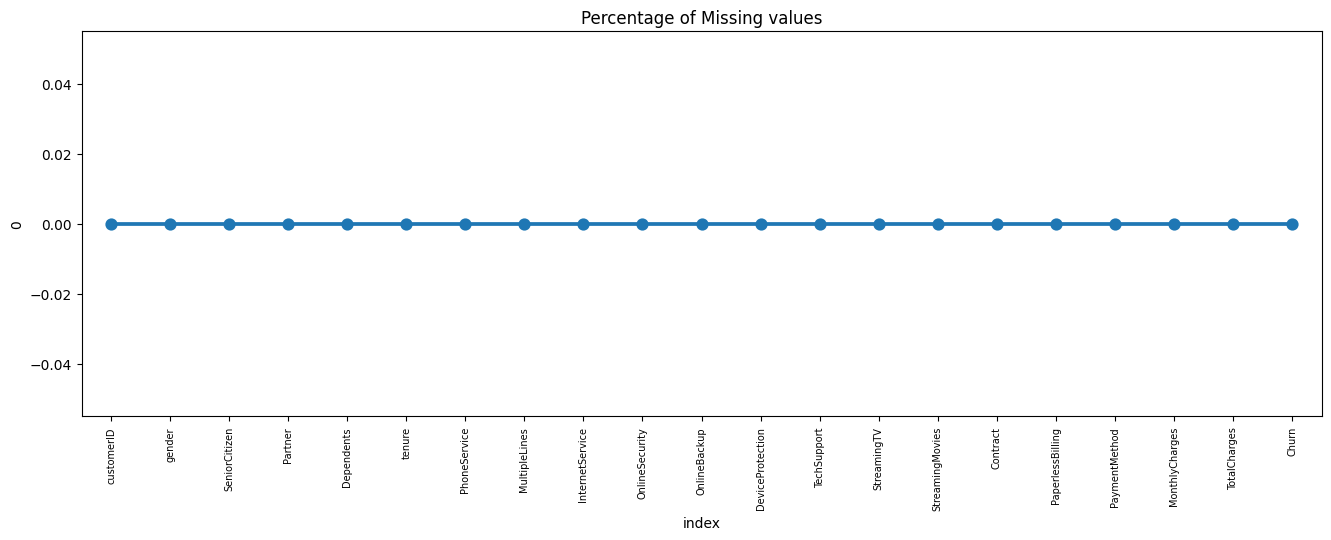

In [ ]:
#Visual Representataion of missing Values
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

missing = pd.DataFrame((data.isnull().sum()) * 100 / data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.show()


Interpretation:
The absence of missing values (zero) indicates that every piece of data required for analysis is present, ensuring the reliability of our conclusions. This means we have complete information for our analysis, leaving no gaps or missing pieces.

In [ ]:
#Dropping Unnecesary Colummns
df=data.drop(columns=["customerID"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Creating List for ONE_HOT_ENCODING and LABEL_ENCODING
binary_columns=[ 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
multiple_column=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod','gender']

In [ ]:
#One_hot_encoding for binary_values
for column in binary_columns:
    df[column] = df[column].map({"No":0, "Yes":1})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
#Label_encoding for Multiple_values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in multiple_column:
    df[column] = label_encoder.fit_transform(df[column])

print("Encoded DataFrame:")
df.head()

Encoded DataFrame:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
#Too check the data_types of features
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [ ]:
#removing the DATA_TYPES which is not good for heat map
df1=df.drop(columns=["MonthlyCharges","TotalCharges"])
df1.dtypes

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
Churn               int64
dtype: object

3) Feature Extraction

<Axes: >

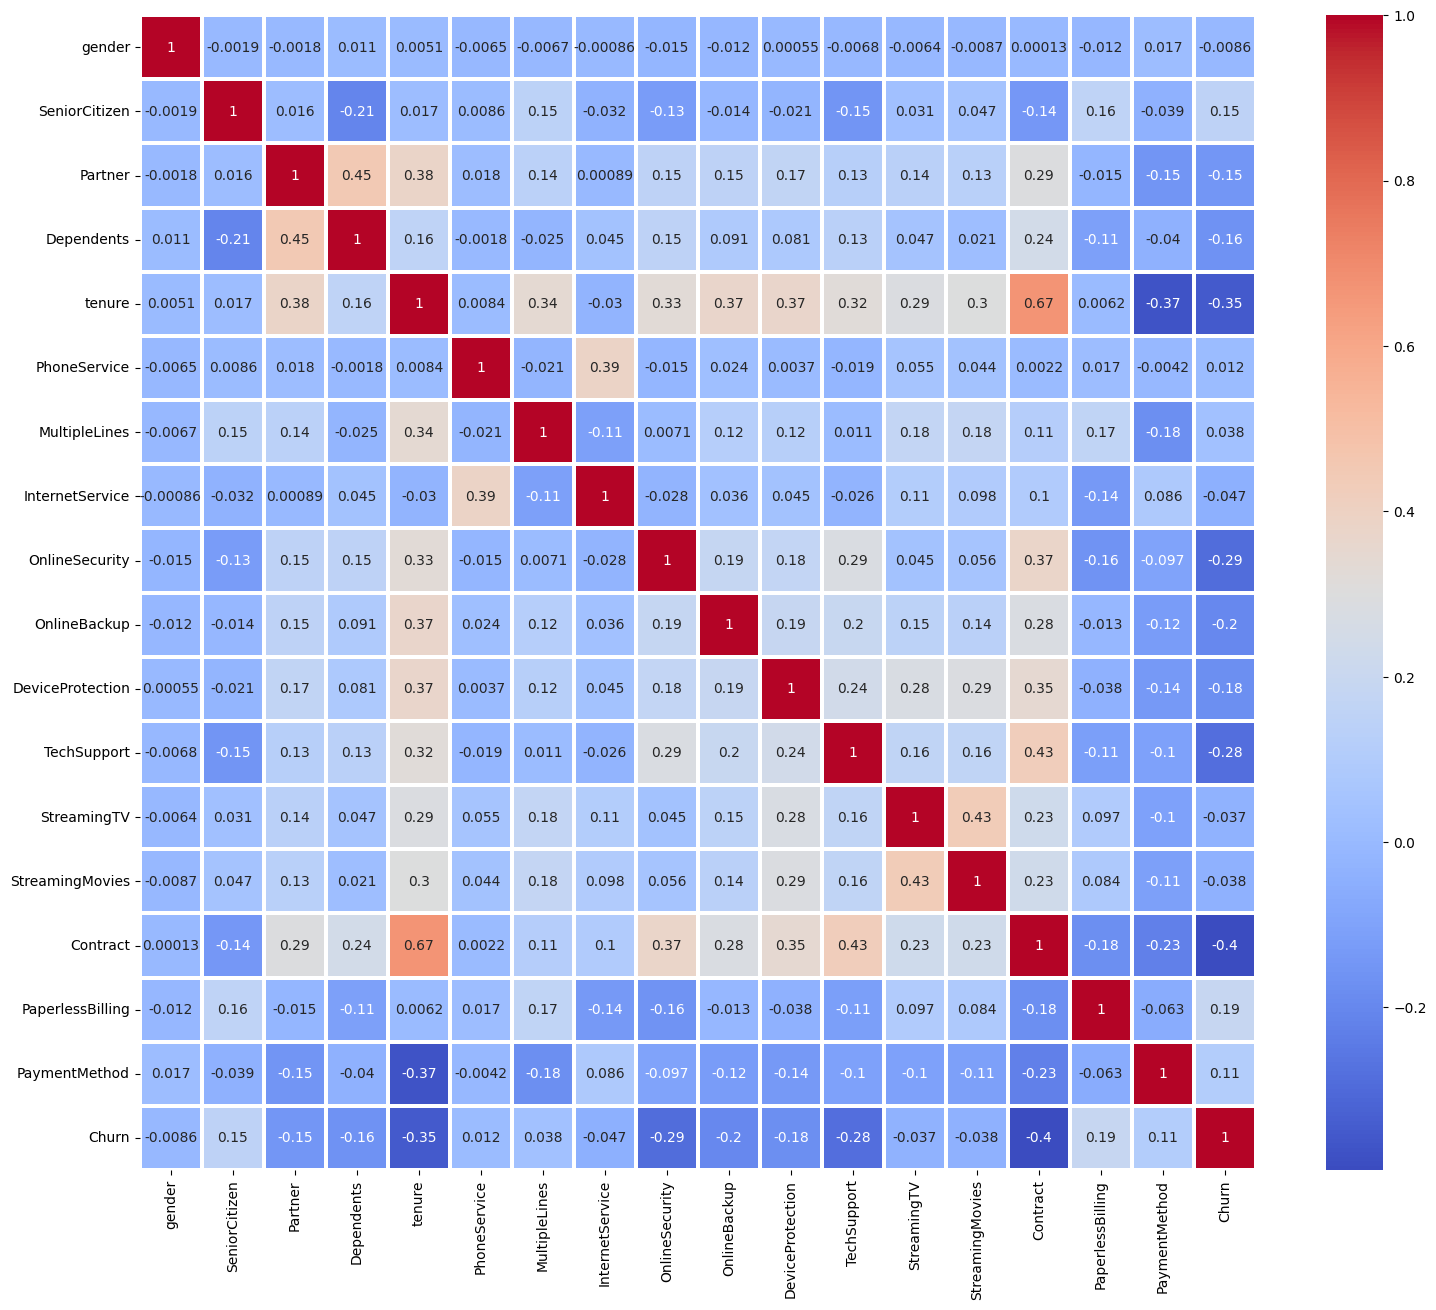

In [ ]:
#Plotting Heat Map to extract relevant Features
import matplotlib.pyplot as plt
import seaborn as sns
cor=df1.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(cor,annot=True,cmap="coolwarm",linewidths=1.5)

In [ ]:
#creating sub_dataframe of relevant features
df2=df[["SeniorCitizen","Partner","Dependents","tenure","PhoneService","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges","Churn"]]
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,2,0,2,0,1,0,3,56.95,1889.5,0
2,0,0,0,2,1,0,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,1,0,0,0,0,0,1,2,70.70,151.65,1


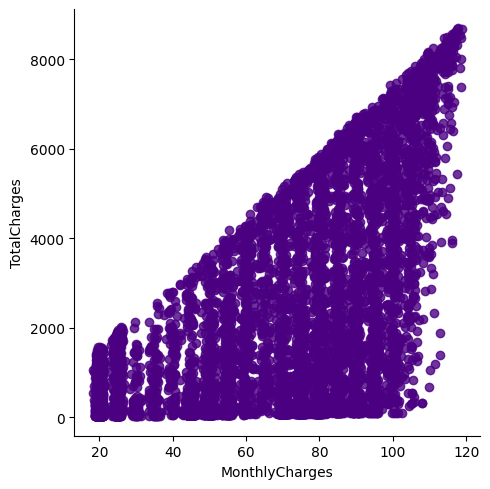

In [ ]:
import pandas as pd
import seaborn as sns

# Copy the DataFrame to avoid the SettingWithCopyWarning
df2 = df.copy()

# Convert 'TotalCharges' to numeric, coerce errors to NaN
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'TotalCharges'
df2 = df2.dropna(subset=['TotalCharges'])

# Now plot the data
sns.lmplot(data=df2, x='MonthlyCharges', y='TotalCharges', fit_reg=False, scatter_kws={'color':'indigo'})


Text(0.5, 1.0, 'Monthly charges by churn')

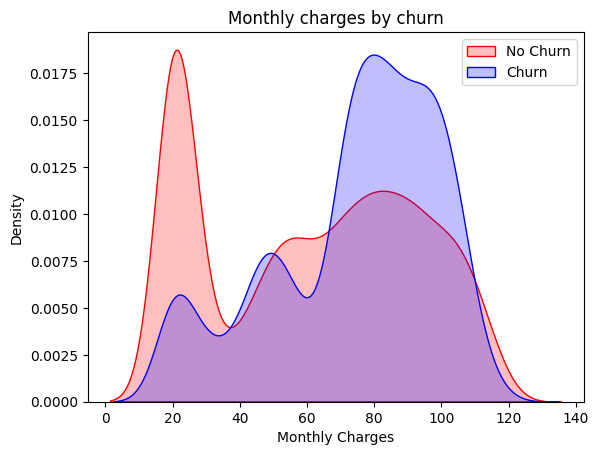

In [ ]:
import seaborn as sns

# Represents Customer Churn with Monthlycharge
Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 0) ],
                  color="Red", fill=True)
Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 1) ],
                  ax=Mth, color="Blue", fill=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


Interpretation:
Customers at low monthly charges are less likely to churn. As monthly charges increases, customer churning increases.

4)Scaling Features

In [ ]:
#Scale the features using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
df2= df2.replace(' ', pd.NA)

# Convert DataFrame to numeric type
df2 = df2.apply(pd.to_numeric, errors='ignore')

# Drop rows with missing values (NaN)
df2 = df2.dropna()

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df2)
scaled_df=pd.DataFrame(data=scaled_data,columns=df2.columns)
scaled_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867,0.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521,0.0
7028,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461,0.0
7029,0.0,0.0,1.0,1.0,0.140845,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809,0.0
7030,1.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210,1.0


5)Dividing the dataset

In [ ]:
#Split the Dataset and choose the variables
#selecting the target variable
from sklearn.model_selection import train_test_split
X=df2.drop(columns=["Churn"])
y=df2["Churn"]

#Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 19)
(1407, 19)
(5625,)
(1407,)


6)Fitting The Model and finding Accuracy of the Model

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

models = [
    ('KNN', KNeighborsClassifier(n_neighbors=7)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),  # Increase max_iter
    ('Random Forest', RandomForestClassifier())
]

for name, model in models:
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{name}: Test Accuracy - {test_accuracy:.3f}")


KNN: Test Accuracy - 0.775
Logistic Regression: Test Accuracy - 0.792
Random Forest: Test Accuracy - 0.783


7)Creating Confusion Matrix

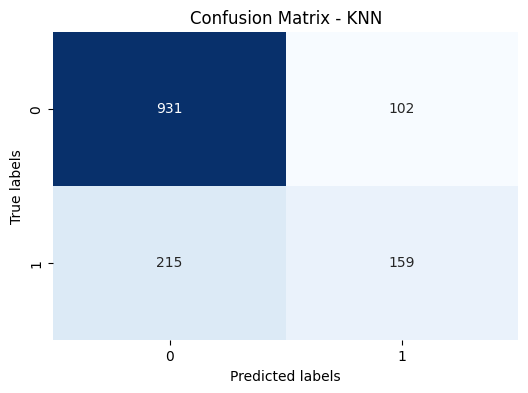

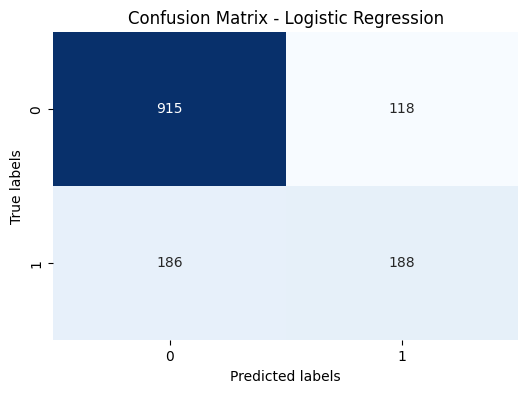

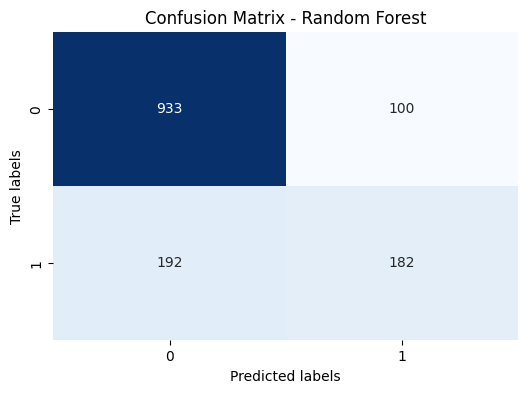

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = [
    ('KNN', KNeighborsClassifier(n_neighbors=7)),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models:
    model.fit(X_train, y_train)
    # Predict on the test data
    y_pred = model.predict(X_test)
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()



In [ ]:
# Compute F1 score for each model
from sklearn.metrics import f1_score
for name, model in models:
    # Predict on the test data
    y_pred = model.predict(X_test)
    # Compute F1 score
    f1 = f1_score(y_test, y_pred)
    # Print F1 score for the model
    print(f"{name} F1 Score: {f1:.3f}")

KNN F1 Score: 0.501
Logistic Regression F1 Score: 0.553
Random Forest F1 Score: 0.555


9)Hyperparameter Tuning

In [ ]:
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Filter out FitFailedWarning and UserWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Define a dictionary of models and their respective parameter grids for hyperparameter tuning
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]})
}

best_model = None
best_score = 0.0

# Hyperparameter tuning and model selection
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Best F1 Score: {grid_search.best_score_:.3f}, Test F1 Score: {f1:.3f}, Best Parameters: {grid_search.best_params_}")
    if f1 > best_score:
        best_score = f1
        best_model = grid_search.best_estimator_

print(f"Best Model: {best_model}, Best F1 Score: {best_score:.3f}")


KNN - Best F1 Score: 0.513, Test F1 Score: 0.509, Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Logistic Regression - Best F1 Score: 0.604, Test F1 Score: 0.553, Best Parameters: {'C': 1, 'penalty': 'l2'}
Random Forest - Best F1 Score: 0.593, Test F1 Score: 0.574, Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Model: RandomForestClassifier(max_depth=10), Best F1 Score: 0.574


Interpretation: Among the models tested, logistic regression performed the best, showing the highest F1 score on the test data without any warning. This suggests that logistic regression is a suitable choice for predicting telecom churn based on the provided features.